## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

[2]

[0]

[2 - sqrt(2), sqrt(2) + 2]

[1 - sqrt(2), 2, sqrt(2) + 3]

[2 - sqrt(2), sqrt(2) + 2]

oo
oo
oo 0


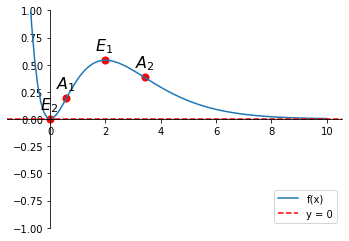

In [61]:
def f(x):
    return x*x*sympy.exp(-x)
x = sympy.Symbol('x')

X = np.linspace(-1, 10, 100) 
ax = plt.gca()
ax.plot(X, [f(i) for i in X], label = r'f(x)')
ax.set_ylim(-1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

df = f(x).diff(x)
df_roots = solve(df, x)
points = [df_roots[0]-1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots)-1)]) 
points.append(df_roots[-1] + 1)
max_arr=[]
min_arr=[]
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i]) 
    df_right = df.subs(x, points[i + 1]) 
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item)
display(max_arr, min_arr)

for i, x0 in enumerate(max_arr + min_arr): 
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red') 
    if x0 < 0:
        XYtext = (-120,-30) 
    else:
        XYtext=(20,-30)
    ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
        xytext=(-10, 10), textcoords='offset points', fontsize=16)

df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
df2_roots.sort() # Упорядочили корни по возрастанию
display(df2_roots)
points2 = [df2_roots[0]-1 ]
points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots)-1)])
points2.append(df2_roots[-1] + 1)
display(points2)
inflection_arr = [item for i, item in enumerate(df2_roots) if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0] 
display(inflection_arr)

for i, x0 in enumerate(inflection_arr): 
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red') 
    if x0 < 0:
        XYtext = (-120,-30) 
    else:
        XYtext=(20,-30) 
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
        xytext=(-10, 10), textcoords='offset points', fontsize=16)
    print(f(x).limit(x, -sympy.oo))

    
print(f(x).limit(x, -sympy.oo), f(x).limit(x, sympy.oo))

ax.axhline(y = 0, color = 'red', linestyle = '--', label = r'y = 0')
ax.legend(loc='lower right')

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

[]

[2]

[]

-oo oo
1 3


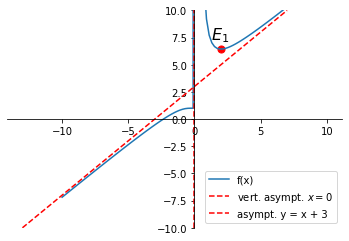

In [62]:
def f(x):
    return x*sympy.exp(2/x) + 1
x = sympy.Symbol('x')

X = np.linspace(-10, 10, 100) 
ax = plt.gca()
ax.plot(X, [f(i) for i in X], label = r'f(x)')
ax.set_ylim(-10, 10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

df = f(x).diff(x)
df_roots = solve(df, x)
points = [df_roots[0]-1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots)-1)]) 
points.append(df_roots[-1] + 1)
max_arr=[]
min_arr=[]
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i]) 
    df_right = df.subs(x, points[i + 1]) 
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item)
display(max_arr, min_arr)

for i, x0 in enumerate(max_arr + min_arr): 
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red') 
    if x0 < 0:
        XYtext = (-120,-30) 
    else:
        XYtext=(20,-30)
    ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
        xytext=(-10, 10), textcoords='offset points', fontsize=16)

df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
display(df2_roots)
    
print(f(x).limit(x, -sympy.oo), f(x).limit(x, sympy.oo))

ax.axvline(x=0, color='red', linestyle='--', label=r'vert. asympt. $x=' + latex(0) + r'$')


a = (f(x)/x).limit(x, sympy.oo)
b = (f(x) - a*x).limit(x, sympy.oo)

print(a,b)
ax.plot([a*i - b for i in X], X, color = 'red', linestyle = '--', label = r'asympt. y = x + 3')

ax.legend(loc='lower right')

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 

[3 - 3*sqrt(3)]

[3 + 3*sqrt(3)]

[-3/2]

[-3/2]

[-5/2, -1/2]

[-3/2]

-oo
-oo oo
1 16


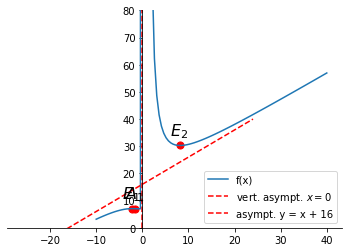

In [60]:
def f(x):
    return (x + 3)*sympy.exp(6/x) + 7
x = sympy.Symbol('x')

X = np.linspace(-10, 40, 100) 
ax = plt.gca()
ax.plot(X, [f(i) for i in X], label = r'f(x)')
ax.set_ylim(0, 80)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

df = f(x).diff(x)
df_roots = solve(df, x)
points = [df_roots[0]-1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots)-1)]) 
points.append(df_roots[-1] + 1)
max_arr=[]
min_arr=[]
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i]) 
    df_right = df.subs(x, points[i + 1]) 
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item)
display(max_arr, min_arr)

for i, x0 in enumerate(max_arr + min_arr): 
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red') 
    if x0 < 0:
        XYtext = (-120,-30) 
    else:
        XYtext=(20,-30)
    ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
        xytext=(-10, 10), textcoords='offset points', fontsize=16)

df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
display(df2_roots)
df2_roots.sort() # Упорядочили корни по возрастанию
display(df2_roots)
points2 = [df2_roots[0]-1 ]
points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots)-1)])
points2.append(df2_roots[-1] + 1)
display(points2)
inflection_arr = [item for i, item in enumerate(df2_roots) if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0] 
display(inflection_arr)

ax = plt.gca() # gca stands for 'get current axis' ax.plot(X, f(X))
for i, x0 in enumerate(inflection_arr): 
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red') 
    if x0 < 0:
        XYtext = (-120,-30) 
    else:
        XYtext=(20,-30) 
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
        xytext=(-10, 10), textcoords='offset points', fontsize=16)
    print(f(x).limit(x, -sympy.oo))

ax = plt.gca() # gca stands for 'get current axis' ax.plot(X, f(X))
    
print(f(x).limit(x, -sympy.oo), f(x).limit(x, sympy.oo))

ax.axvline(x=0, color='red', linestyle='--', label=r'vert. asympt. $x=' + latex(0) + r'$')


a = (f(x)/x).limit(x, sympy.oo)
b = (f(x) - a*x).limit(x, sympy.oo)

print(a,b)
ax.plot([a*i - b for i in X], X, color = 'red', linestyle = '--', label = r'asympt. y = x + 16')

ax.legend(loc='lower right')